In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch12. 데이터 시각화</font></b>

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
# 한글설정(windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

# 2 장 seaborn
- matplotlib 기반으로 만든 고수준 그래픽 라이브러리
    - 공식 사이트 : https://seaborn.pydata.
    - 그래프 API : https://seaborn.pydata.org/api.html48
- seaborn으로 그래프 그리기 위한 단계
    1) 데이터 준비<br>
    2) 미적속성 설정<br>
    3) 함수를 이용해서 그래프 그리기(관계형=수치형, 범주형, 쌍관계, 밀도, 회귀, 다중)<br>
    4) 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanlc

In [3]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2.2 미적 속성 설정하기(style, context, p
### 1) 그래프 스타일 지정
- white, whithgrid, darkgrid, dark, ticks
### 2) 컨텍스트 지정(배율)
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
### 3) 컬러팔레트
- https://matplotlib.org/stable/tutorials/colors/colormaps.html colormap
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://seaborn.pydata.org/tutorial/color_palettes.html

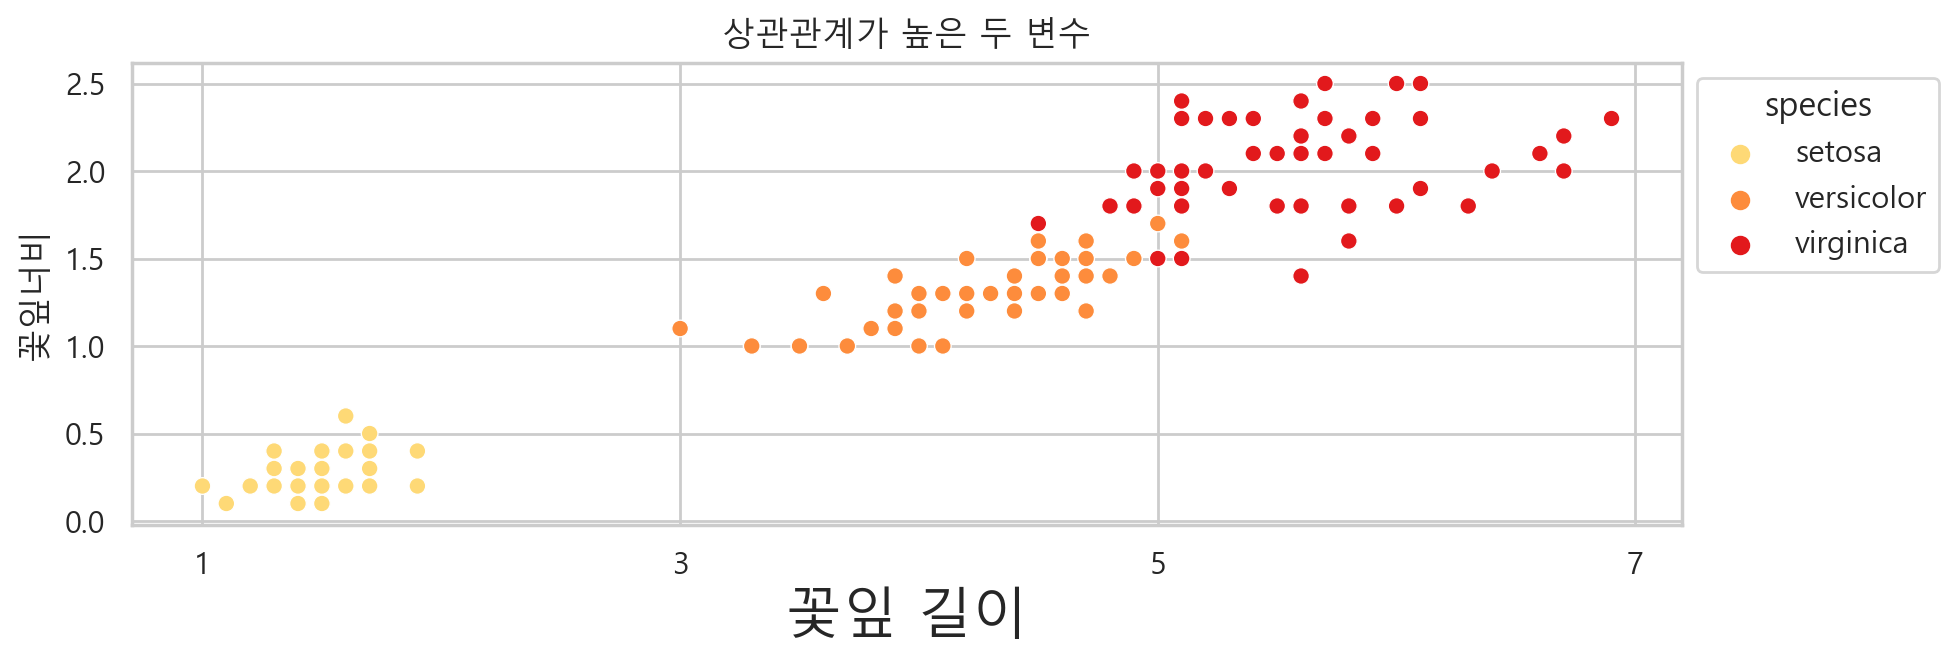

In [21]:
plt.figure(figsize=(10,3))
# 기본 미적 속성 설정
sns.set(style='whitegrid', context='notebook',
       palette='Set1',
       rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='YlOrRd')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계가 높은 두 변수',
      ylabel='꽃잎너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
ax.set_xticks([1, 3, 5, 7])
plt.show()

## 2.3 seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
- scatterplot, linplot, relplot(서브플롯제공) : x가 수치형

In [22]:
# 기본 미적 속성 설정
sns.set(style='whitegrid', context='notebook',
       palette='Set1',
       rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

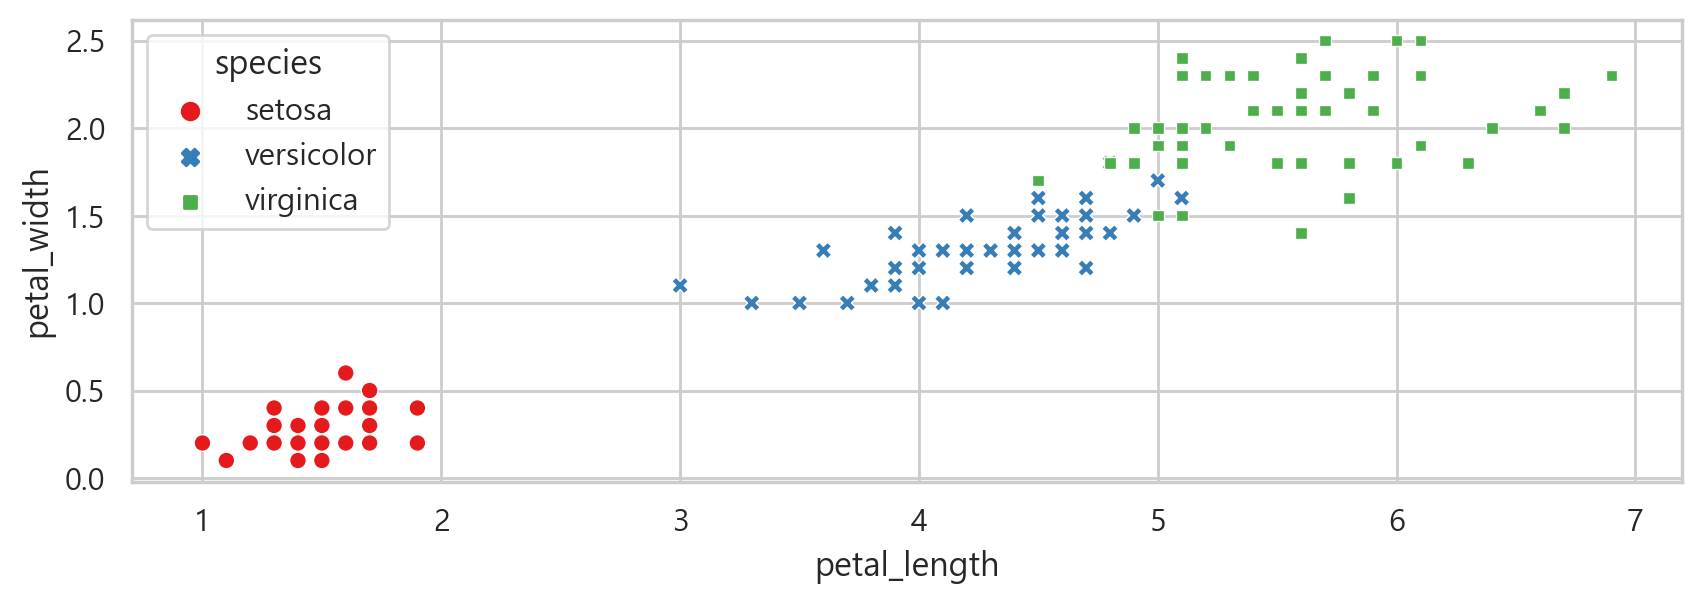

In [25]:
# 종별 다른색상과 다른 스타일로 scatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               style='species', palette='Set1')
plt.show()

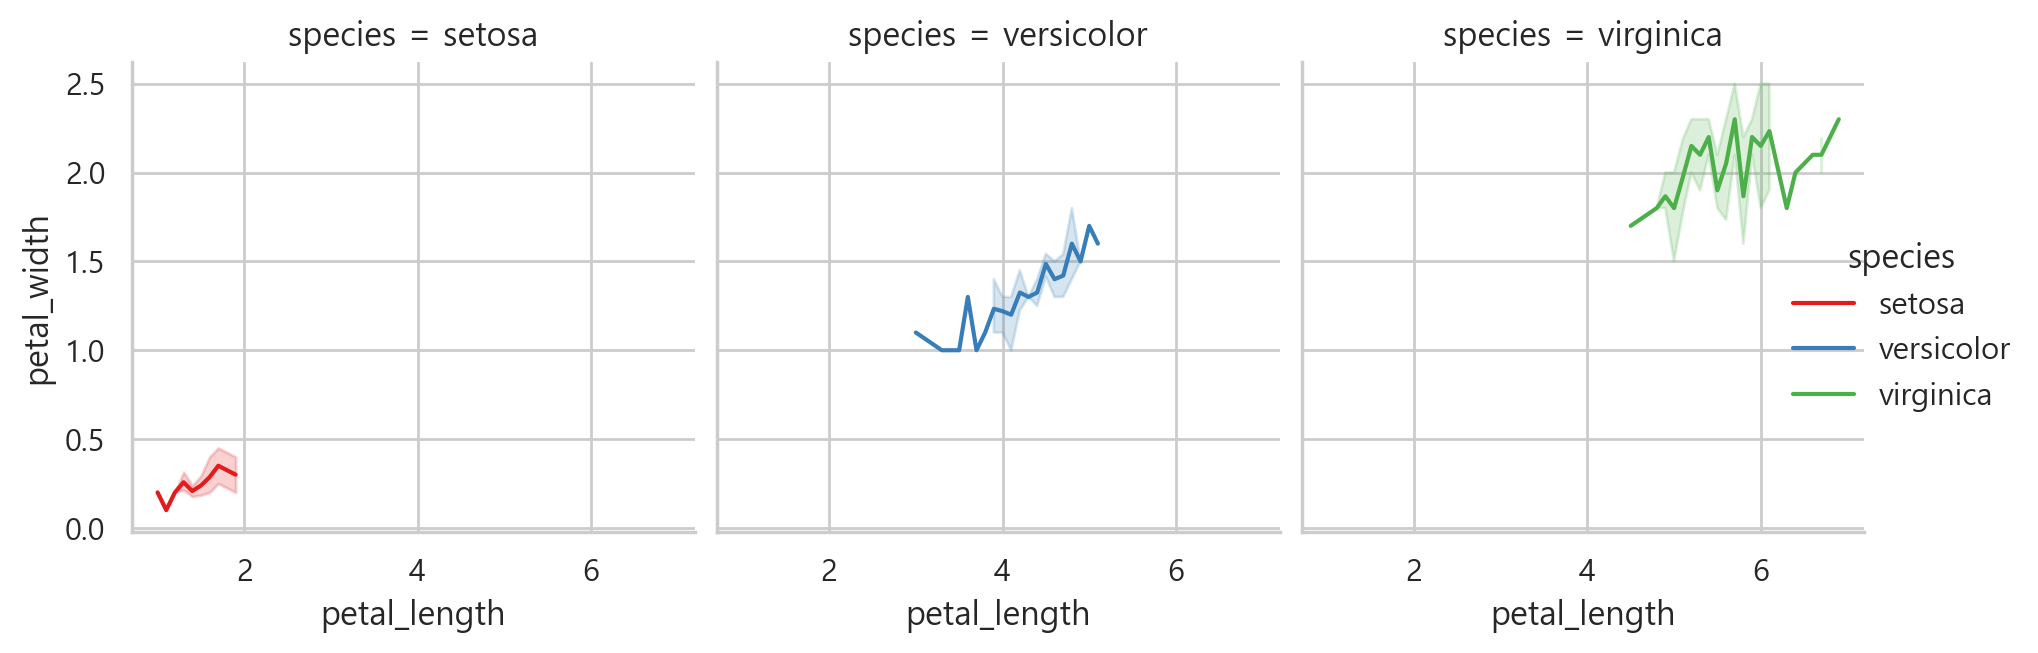

In [31]:
# 종별 lineplot을 서브플롯으로
g = sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           kind='line', # 서브플롯으로 그려질 그래프 종류(기본값: scatter)
           col='species', # col 단위로 서브플롯 표현
           # col_wrap=2, # 한줄에 표현될 서브플롯 수
           # facet_kws={'sharey':False}, # 축공유
           ) 
# 크기 조정
g.fig.set_size_inches(10,3)
plt.show()

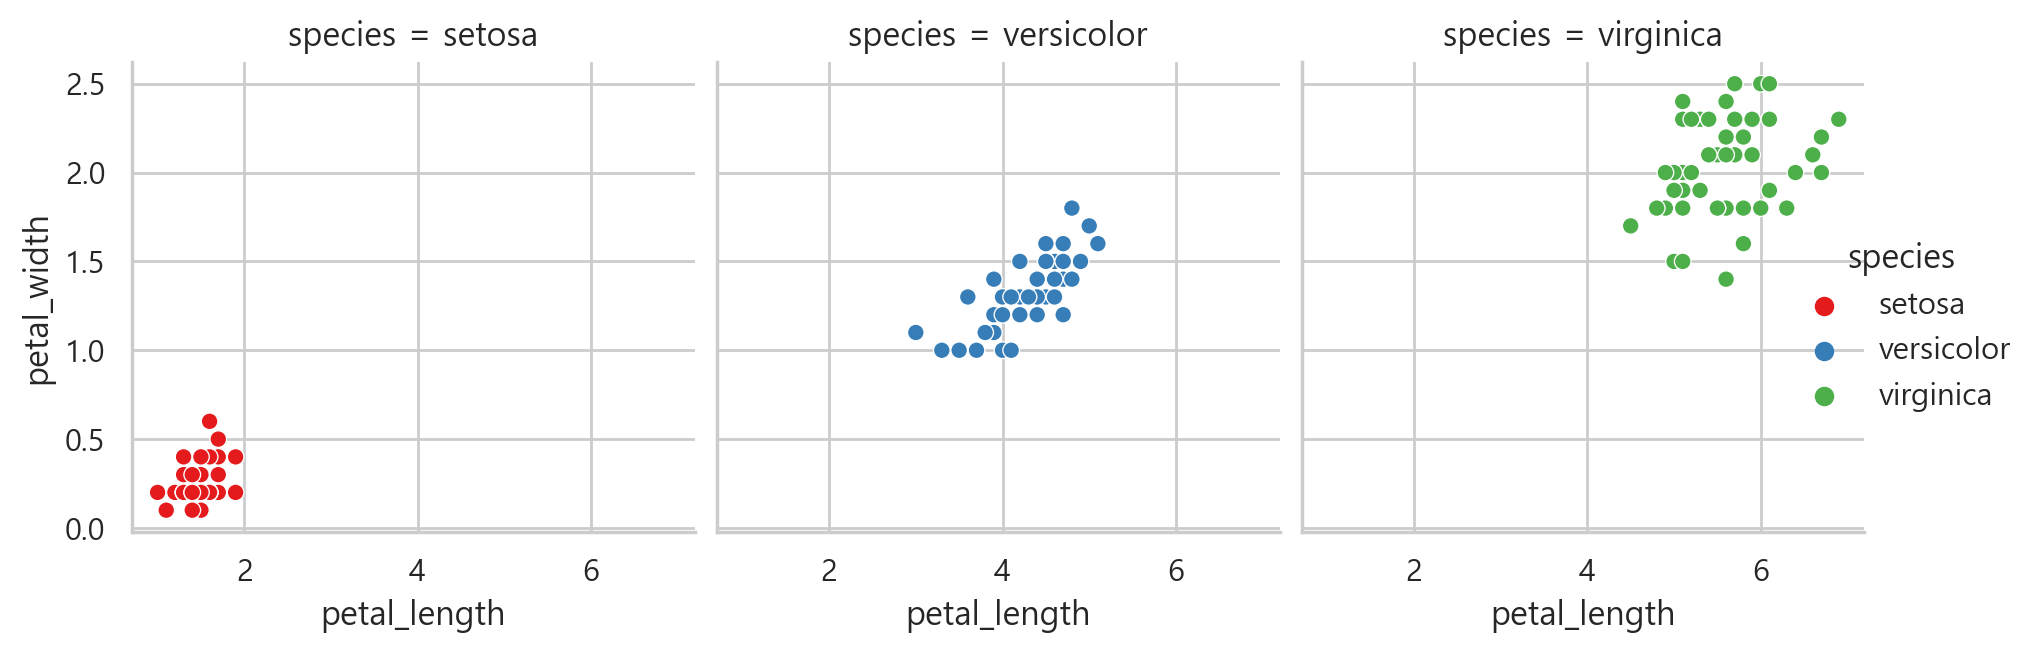

In [32]:
# 종별 scatterplot을 서브플롯으로
g = sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           kind='scatter', # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
           col='species', # col단위로 서브플롯 표현
           #col_wrap=2,    # 한줄에 표현될 서브플롯 수 
           #facet_kws={'sharey':False} # 축공유
           )
# 크기 조정
g.fig.set_size_inches(10,3)
plt.show()

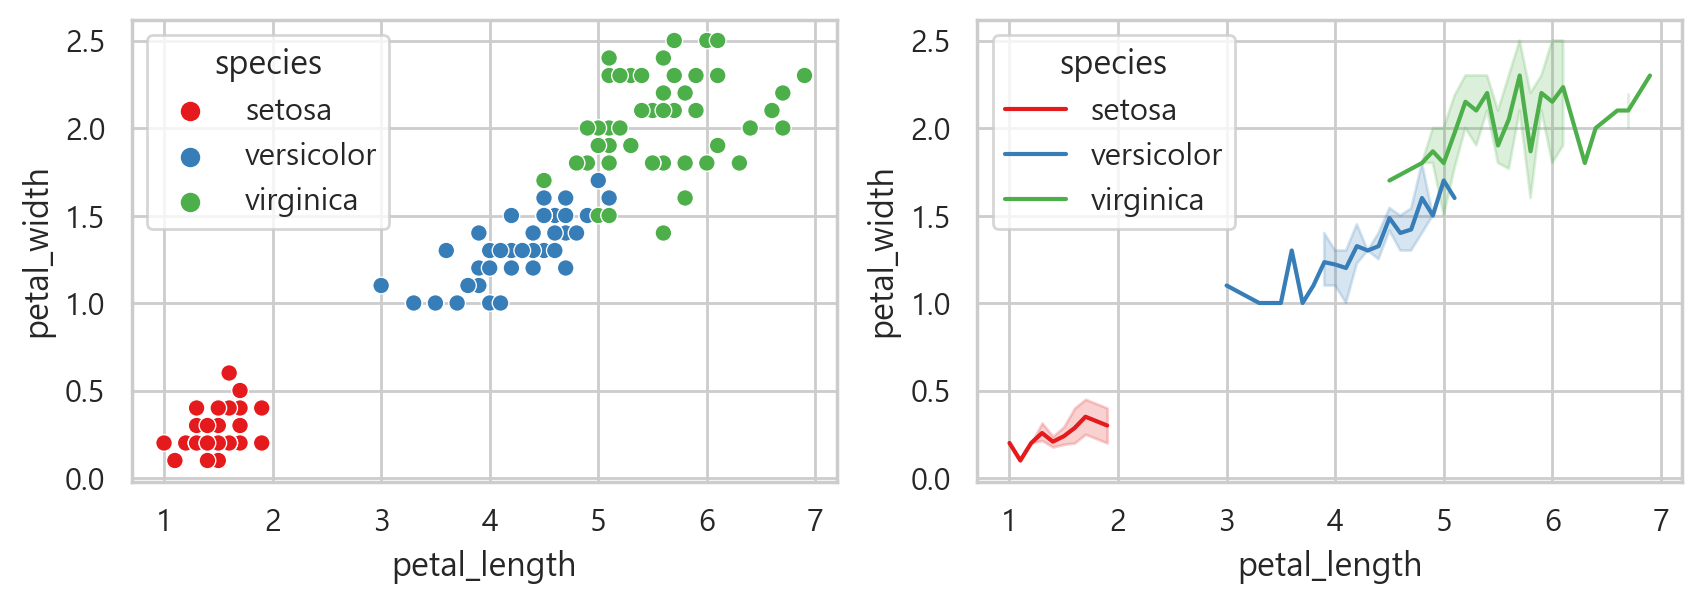

In [33]:
# ax[0]에는 scatter, ax[1]에는 line
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot(무작위로 흩뿌림), swarmplot(겹치지않음)
- barplot, pointplot(막대대신 marker가 있는 선)
- countplot(bar는 y의 평균값이 높이, count는 x의 빈도수 높이)
- boxplot, violonplot, boxenplot => catplot

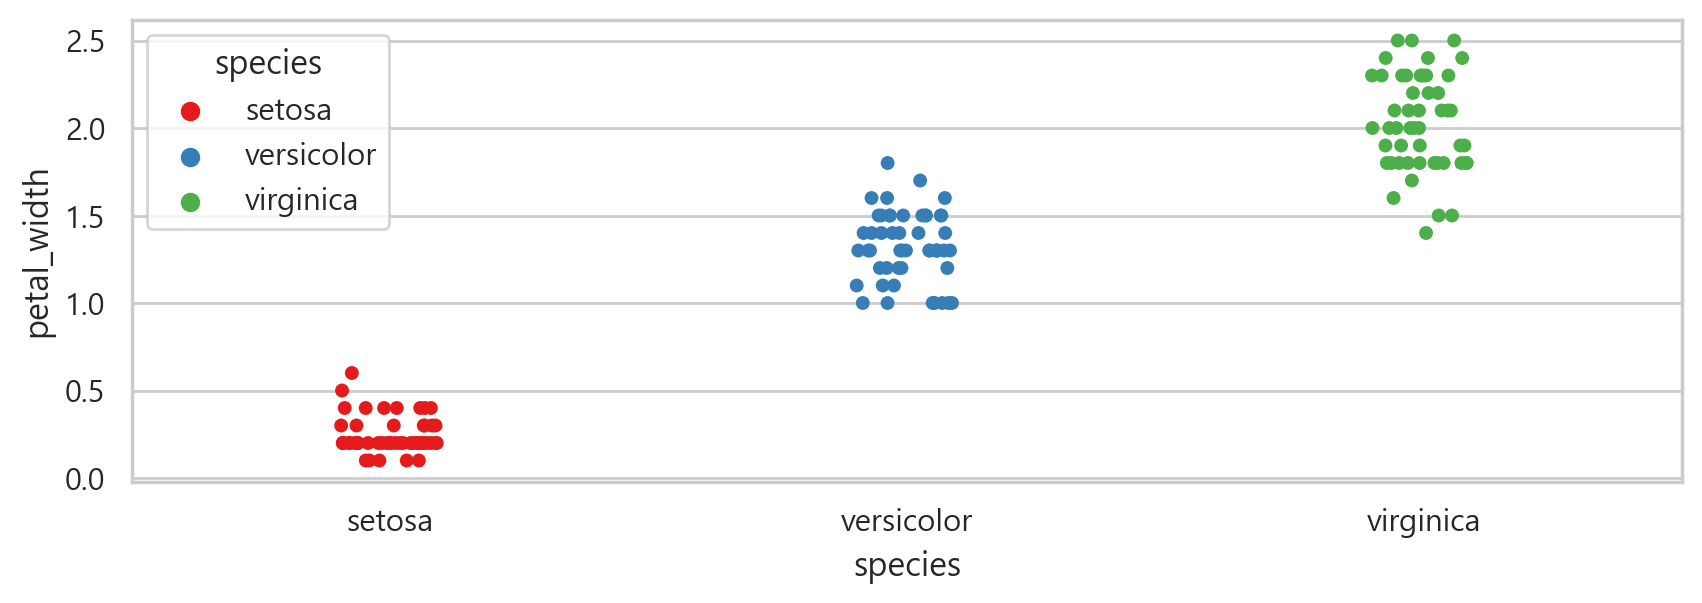

In [35]:
# x축이 범주형일때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species',
             palette='Set1')
plt.show()

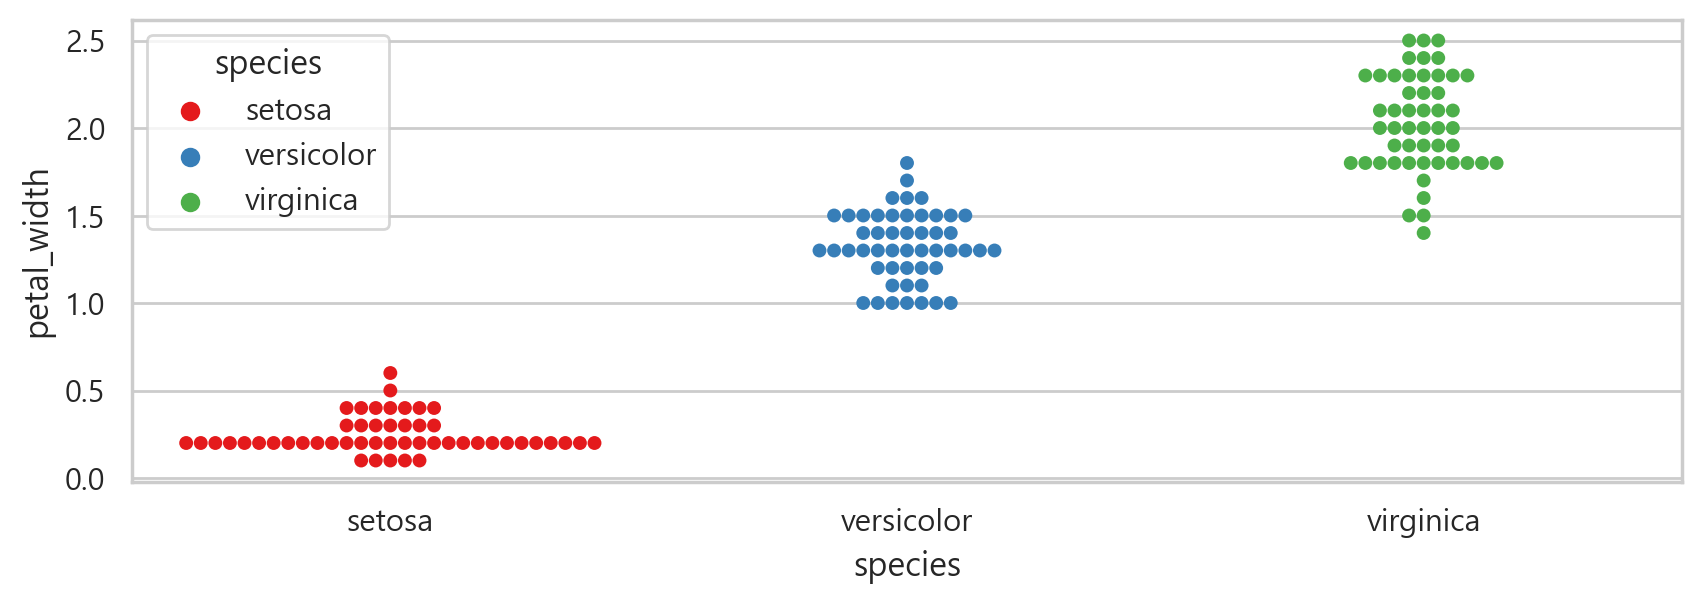

In [37]:
# x축이 범주형일때의 산점도(중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species',
             palette='Set1')
plt.show()

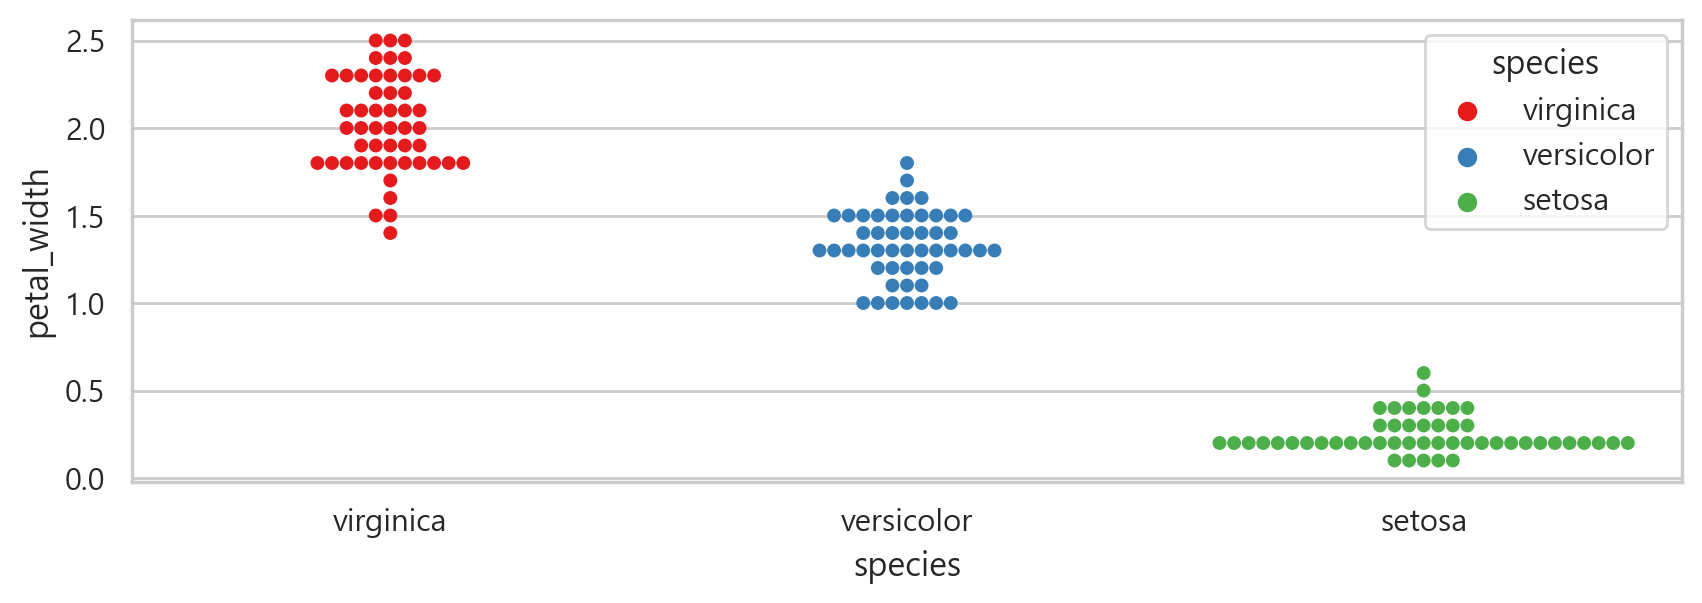

In [38]:
# 내림차순으로 정렬된 iris 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False),
             x='species', y='petal_width', hue='species',
             palette='Set1')
plt.show()

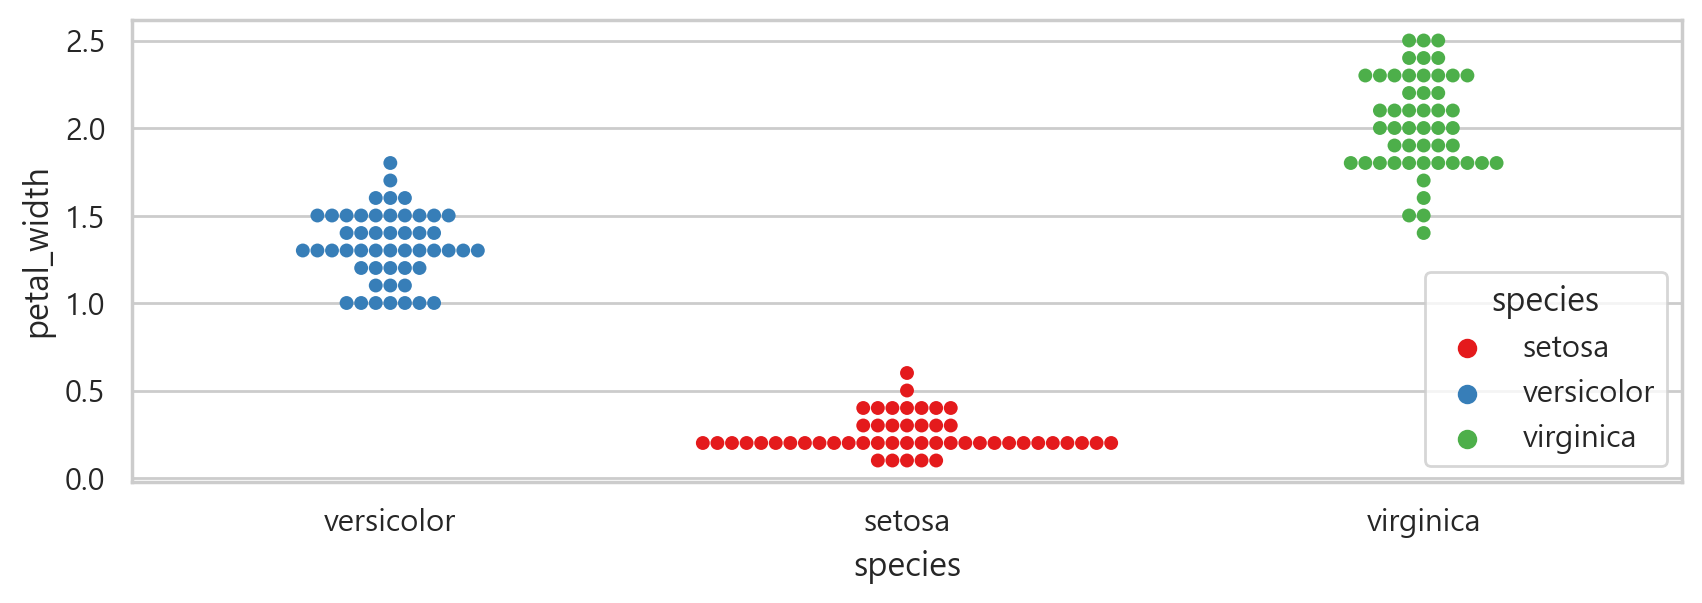

In [39]:
# x축의 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris,
             x='species', y='petal_width', hue='species',
             palette='Set1',
             order=['versicolor', 'setosa', 'virginica'])
plt.show()

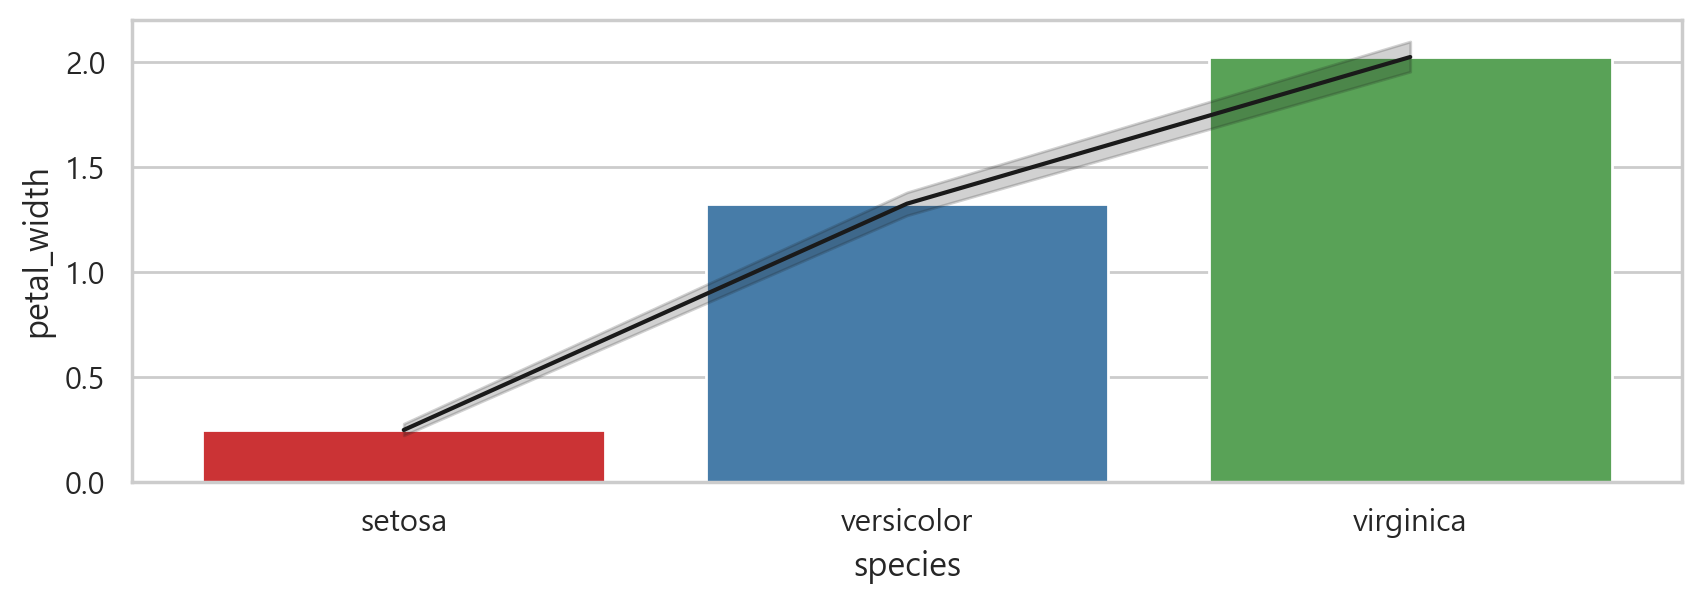

In [41]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간
sns.barplot(data=iris, x='species', y='petal_width', errorbar=None)
sns.lineplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

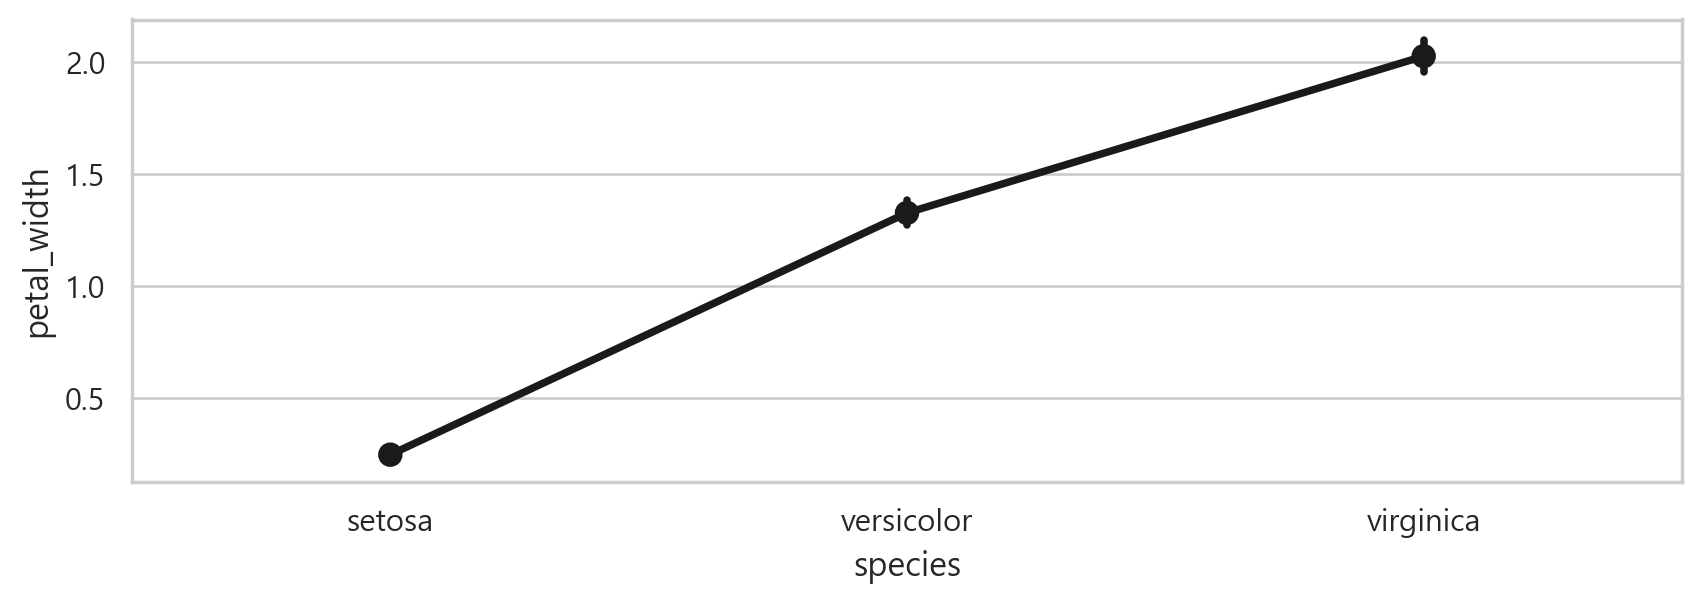

In [42]:
sns.pointplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

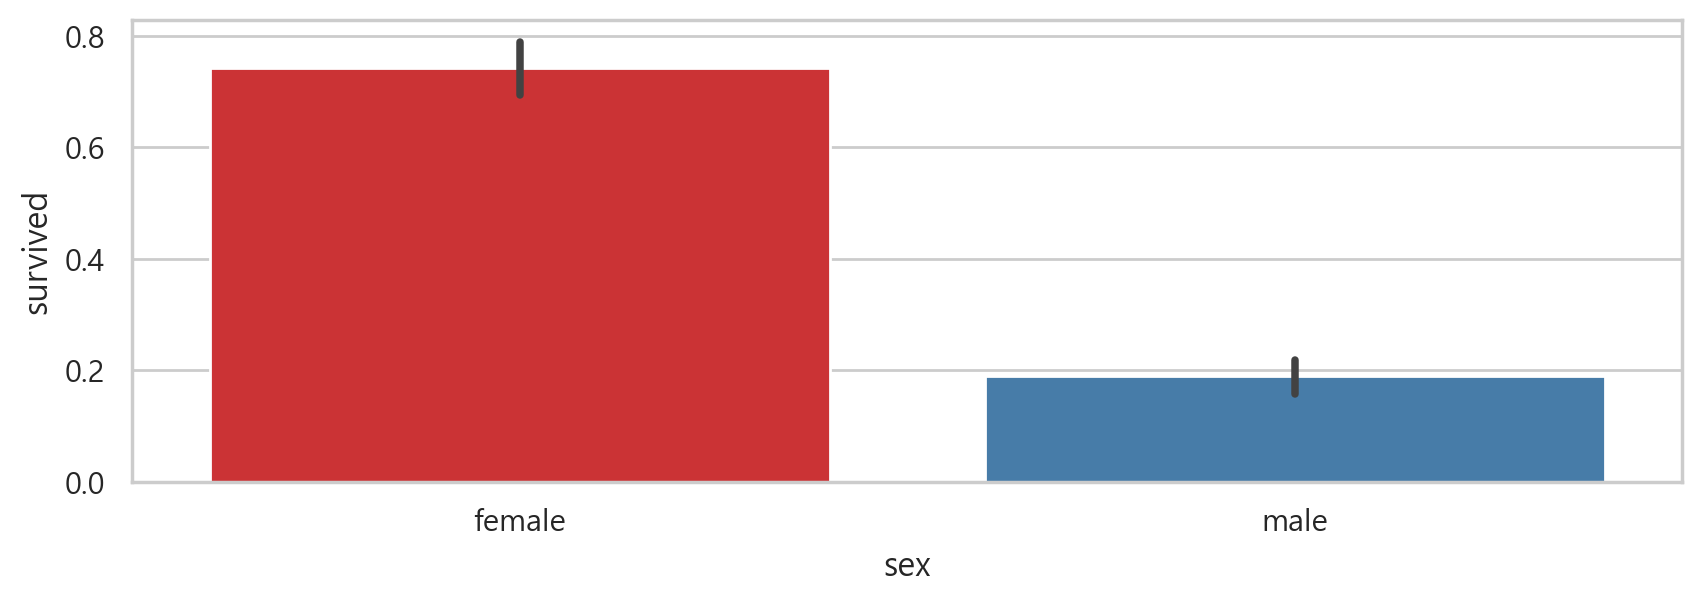

In [43]:
# 성별 평균 생존율을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female', 'male'],
           palette='Set1')
plt.show()

In [44]:
# 남여 데이터 수
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [ ]:
# 남여 데이터 수(정렬)
titanic['sex']['survived'].count()

<Axes: xlabel='sex', ylabel='survived'>

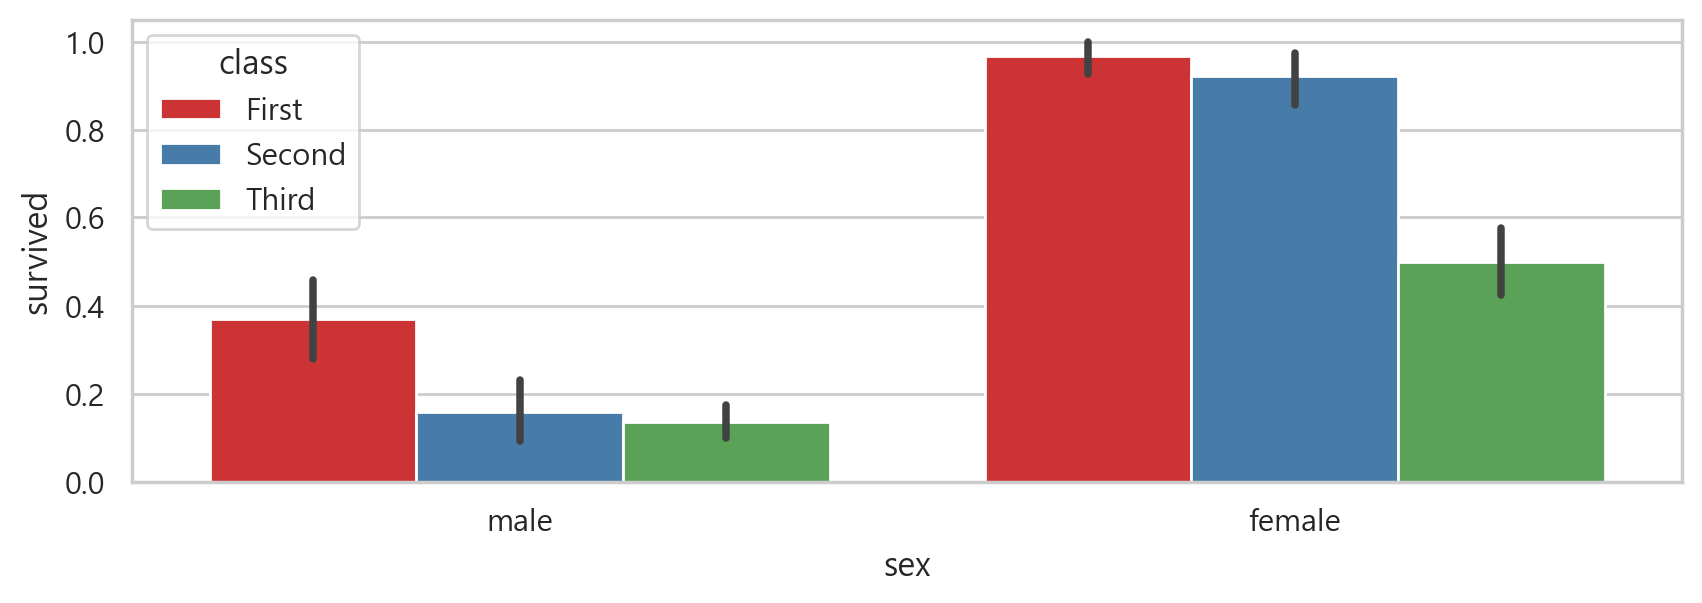

In [47]:
# class별 생존률
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

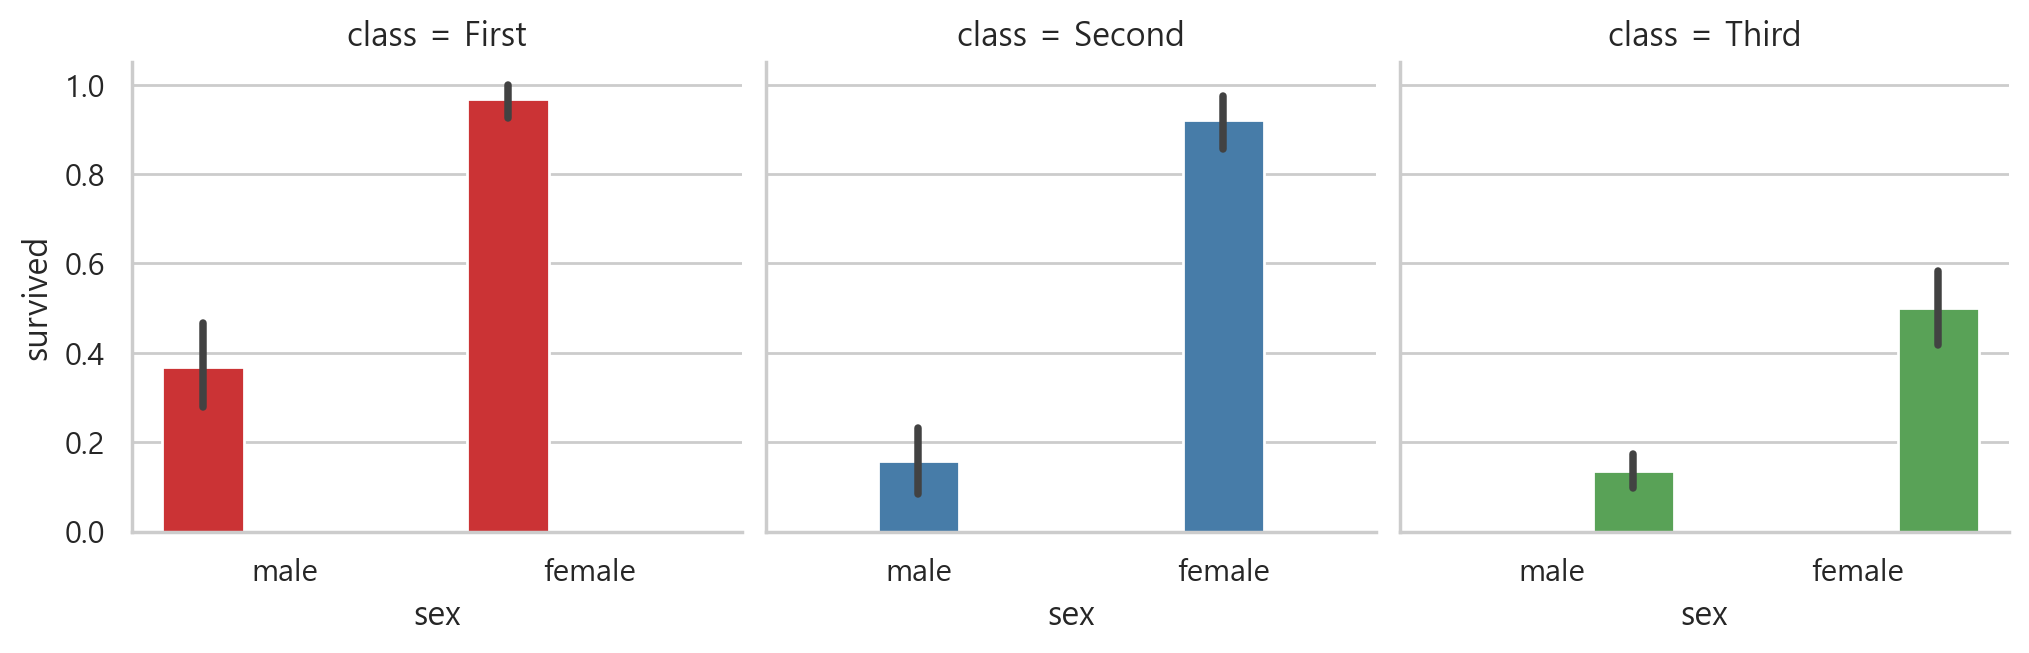

In [52]:
# class별 성별 생존률을 서브플롯
g = sns.catplot(data=titanic,
               x='sex',
               y='survived',
               hue='class',
               kind='bar', # 기본값은 strip
               col='class')
g.fig.set_size_inches(10,3)

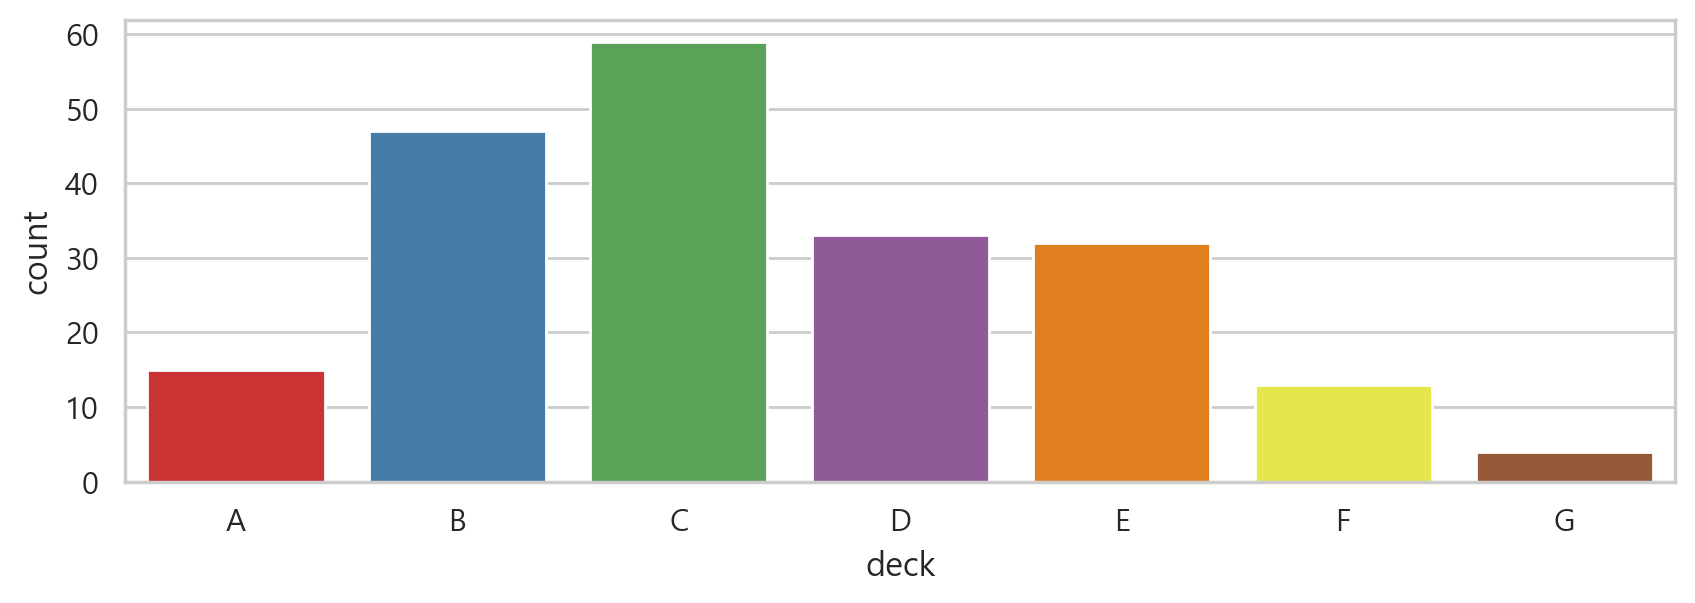

In [53]:
# deck별 데이터수를 막대그래프로(countplot)
sns.countplot(data=titanic, x='deck')
plt.show()

In [54]:
# deck별 갯수
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

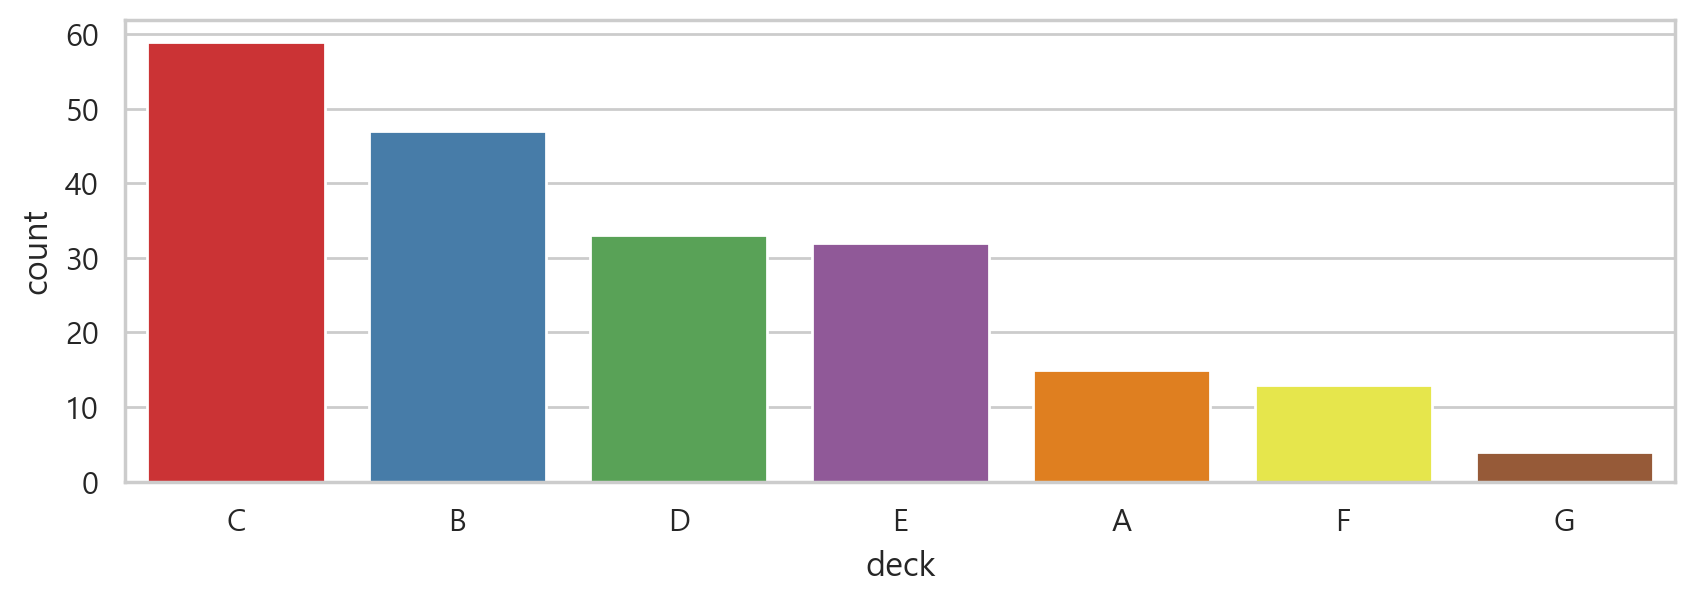

In [55]:
# deck별 데이터수를 막대그래프로(countplot)
sns.countplot(data=titanic, x='deck', order=titanic['deck'].value_counts().index)
plt.show()

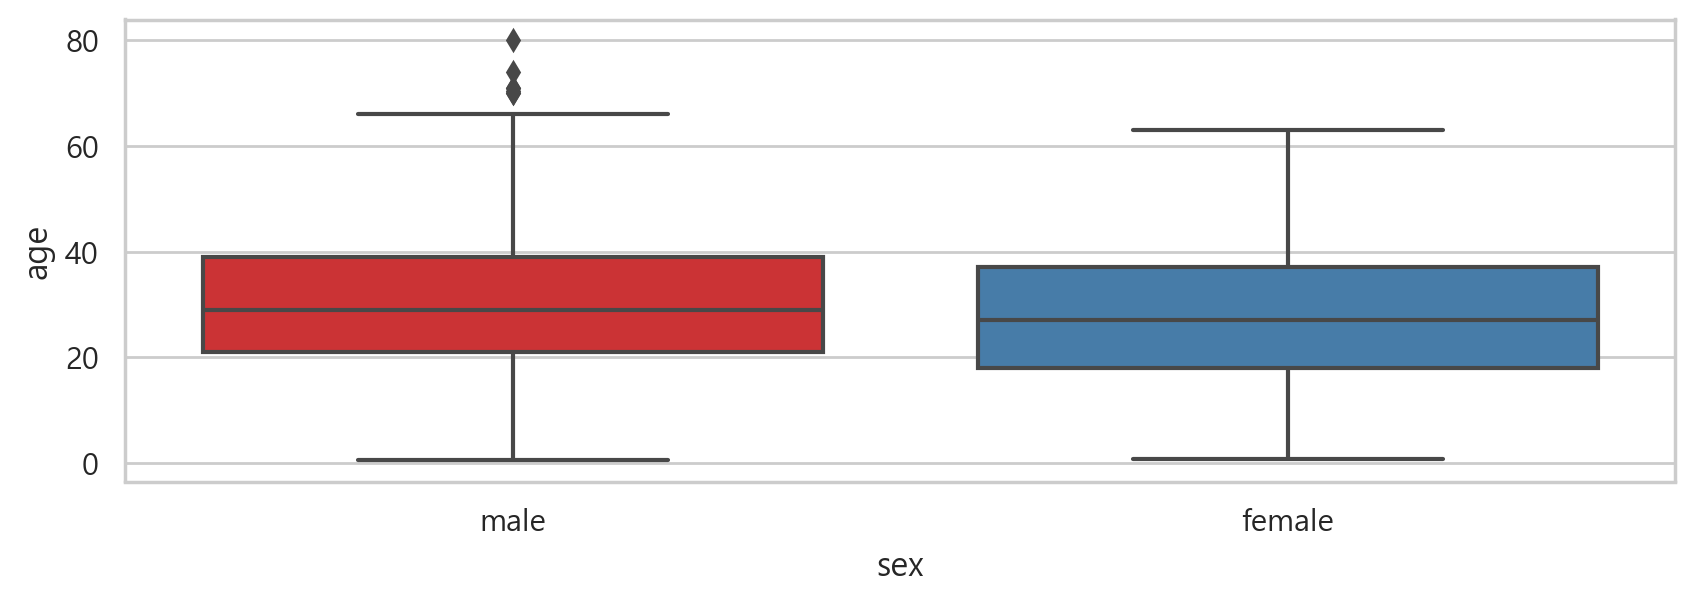

In [56]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age')
plt.show()

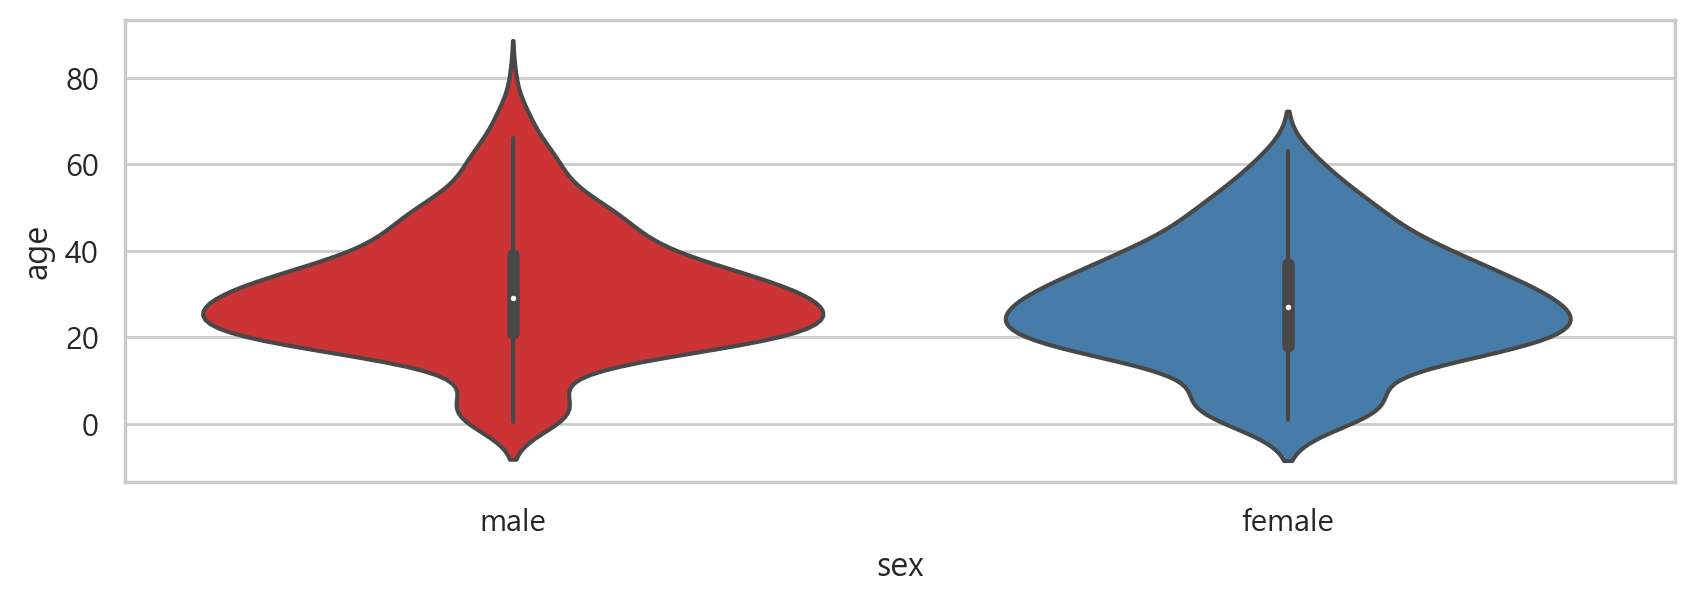

In [57]:
# violinplot
sns.violinplot(data=titanic, x='sex', y='age')
plt.show()

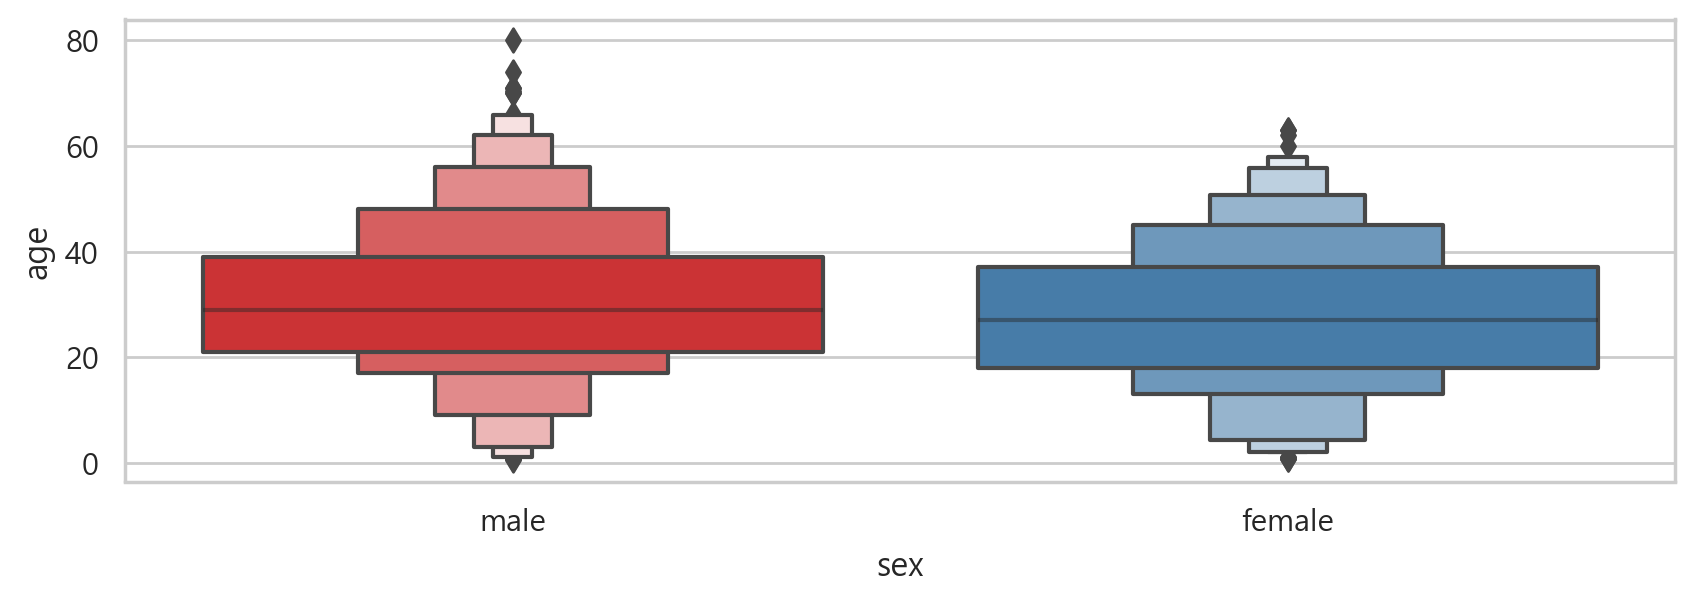

In [58]:
# boxenplot
sns.boxenplot(data=titanic, x='sex', y='age')
plt.show()

### 3) 쌍관계 그래프
- pairplot : 모든 수치형 변수 쌍에 대해 산점도와 히스토그램을 보여줌

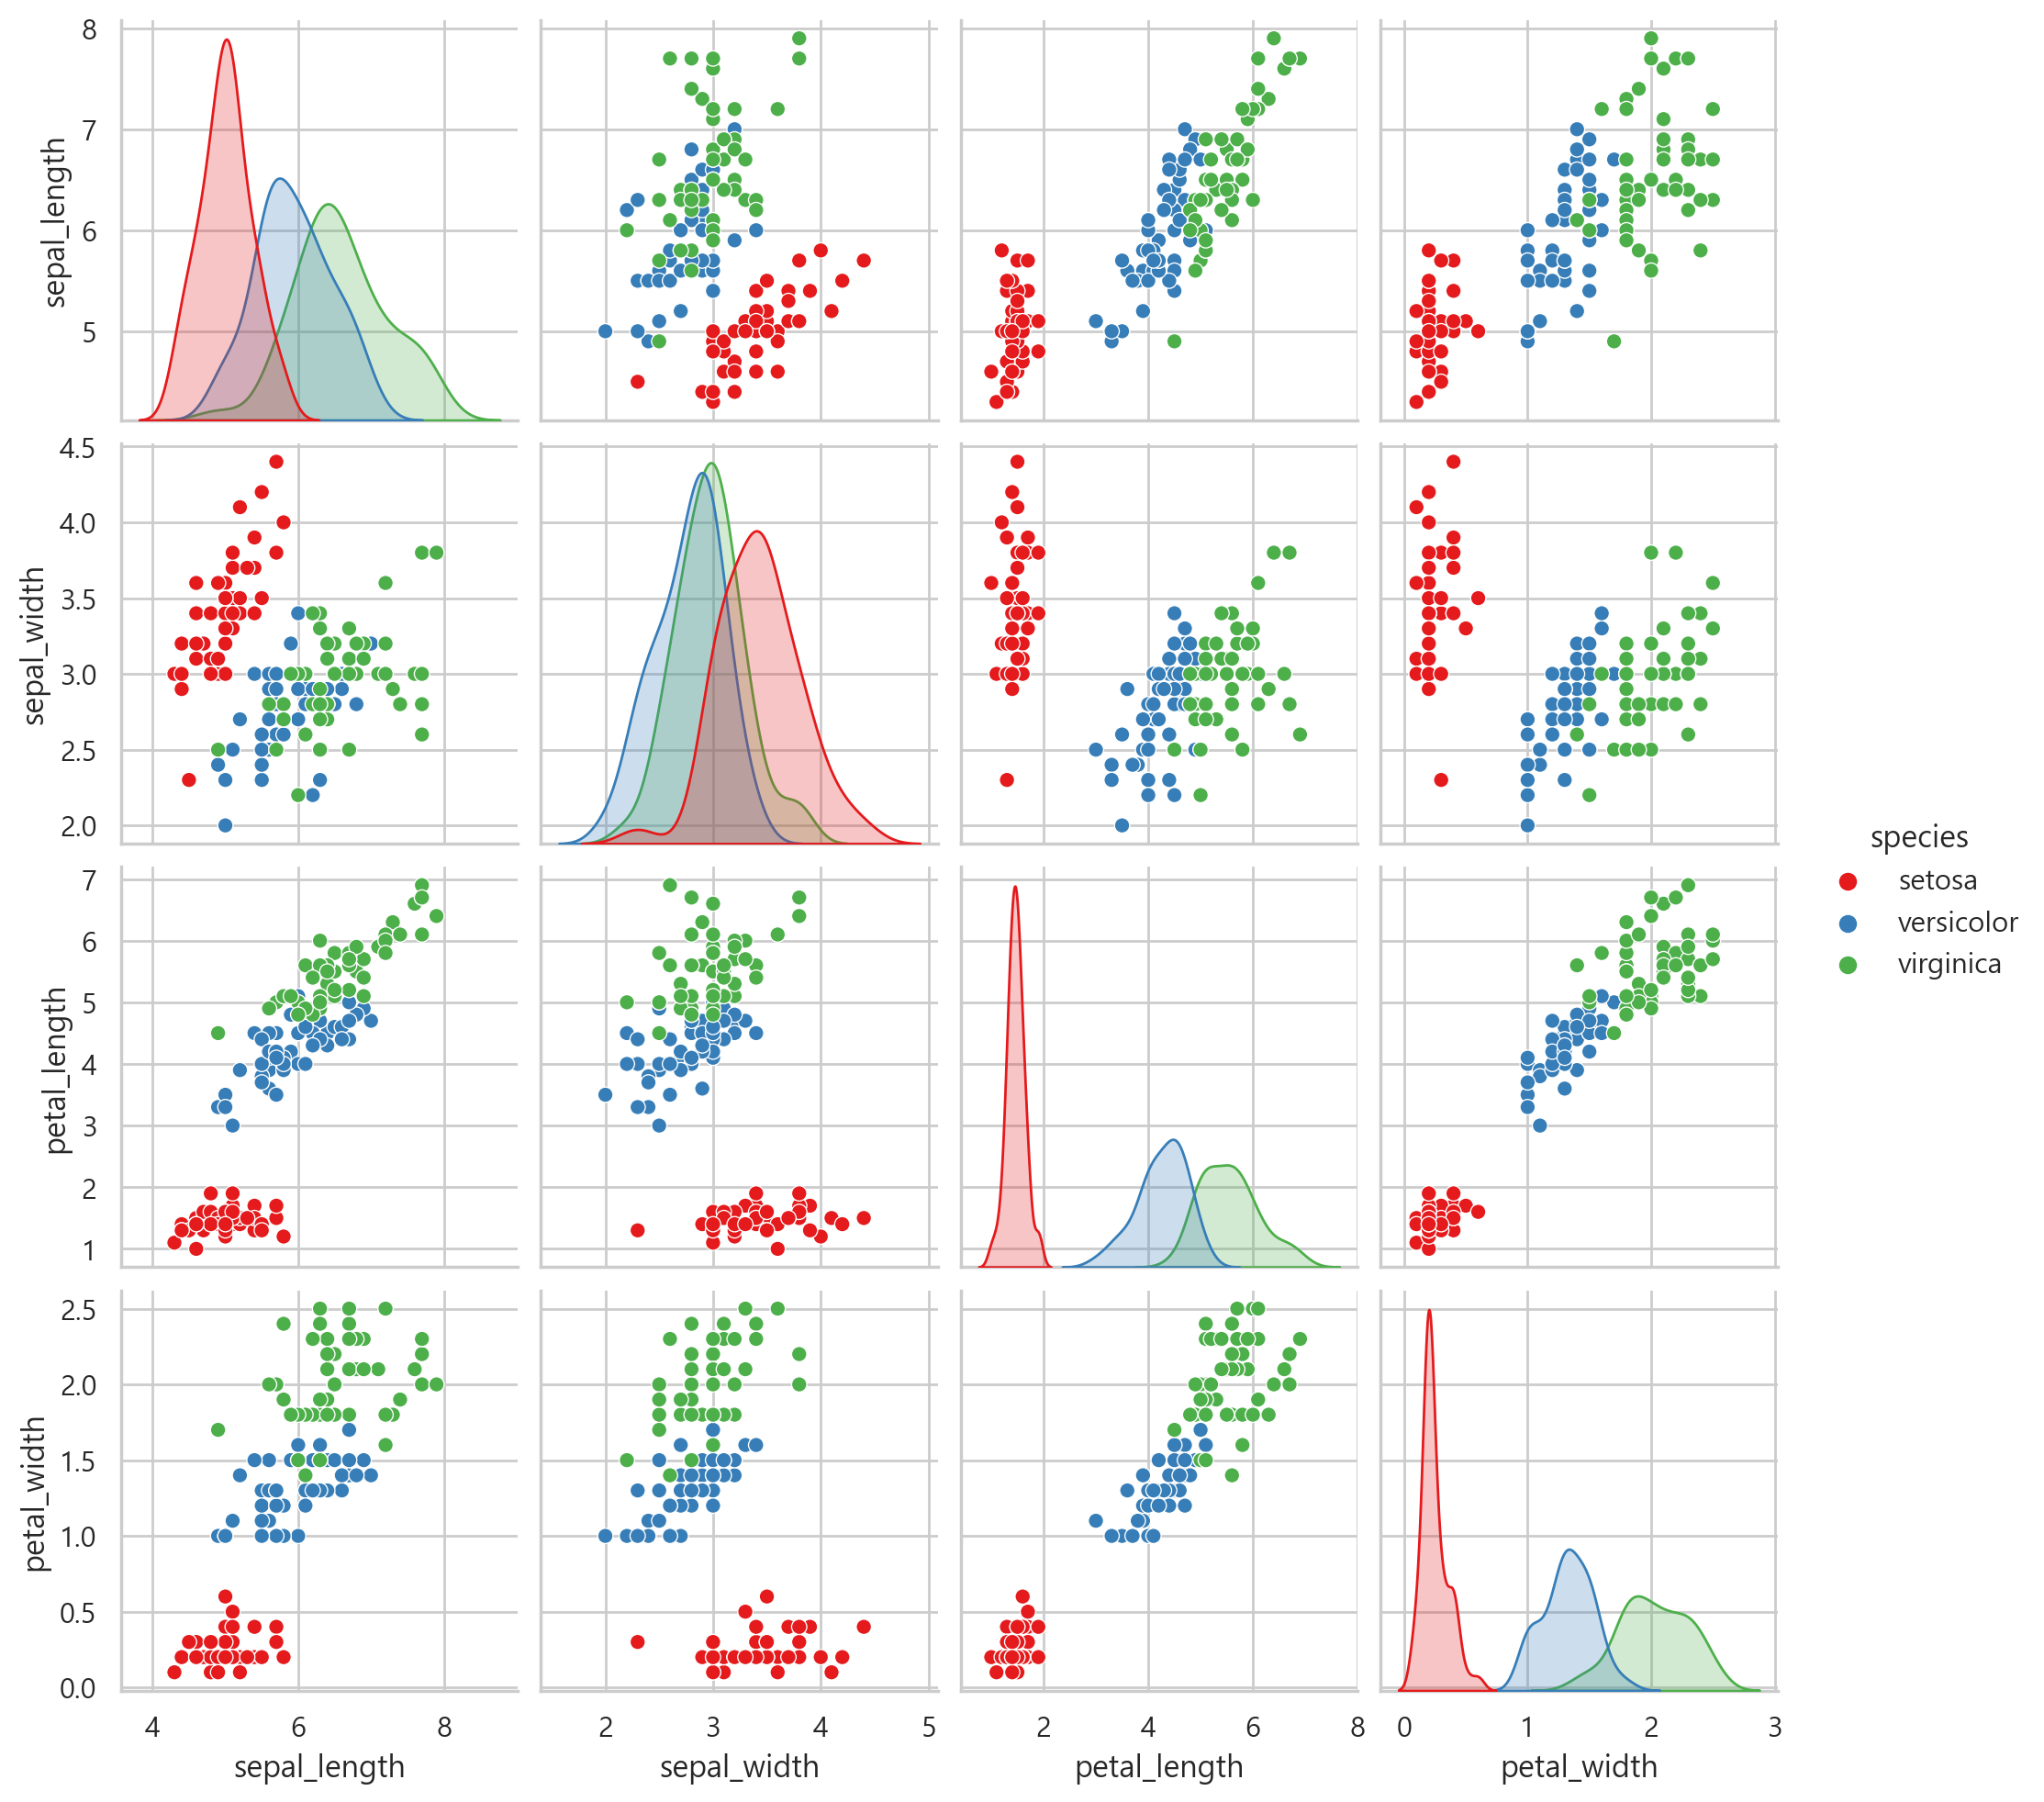

In [59]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도그래프

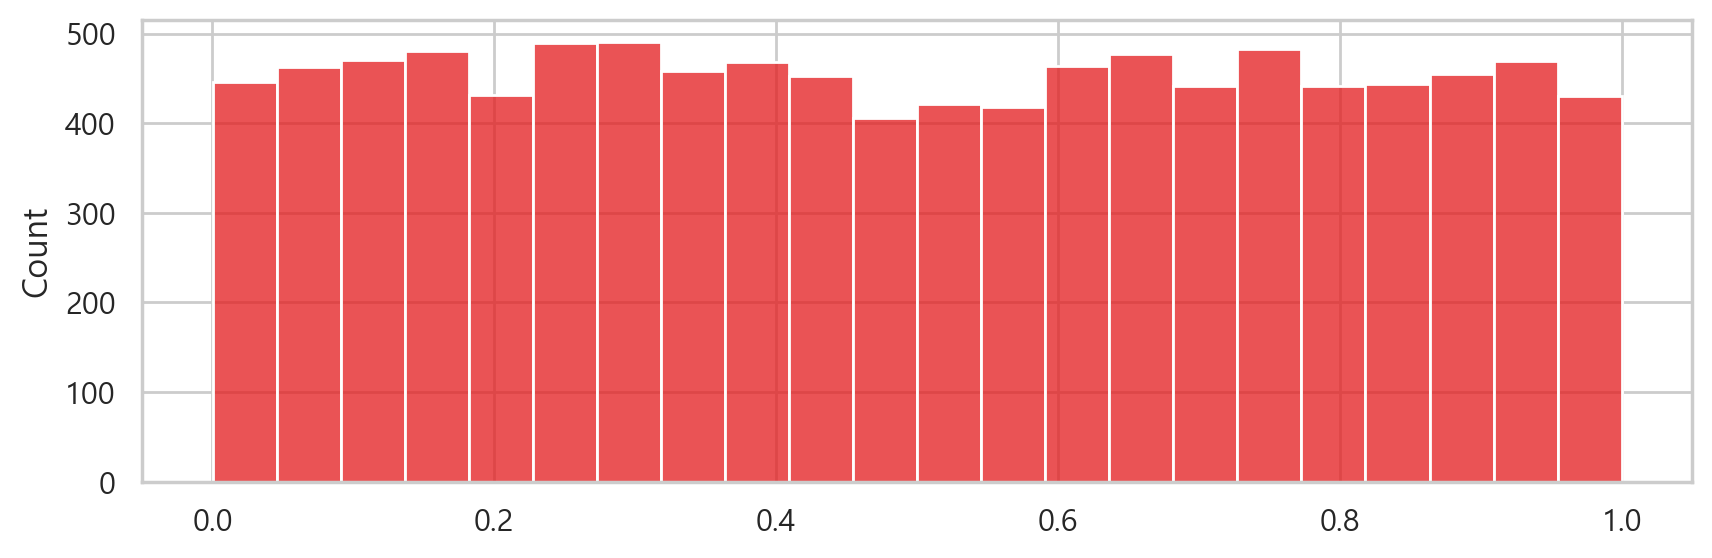

In [63]:
import numpy as np
x = np.random.random(10000) # 평균0 표준편차 1인 정규분포를 이루는 10000개 데이터
sns.histplot(x, kde=False) # kde=False 분포를 매끄럽게
plt.show()

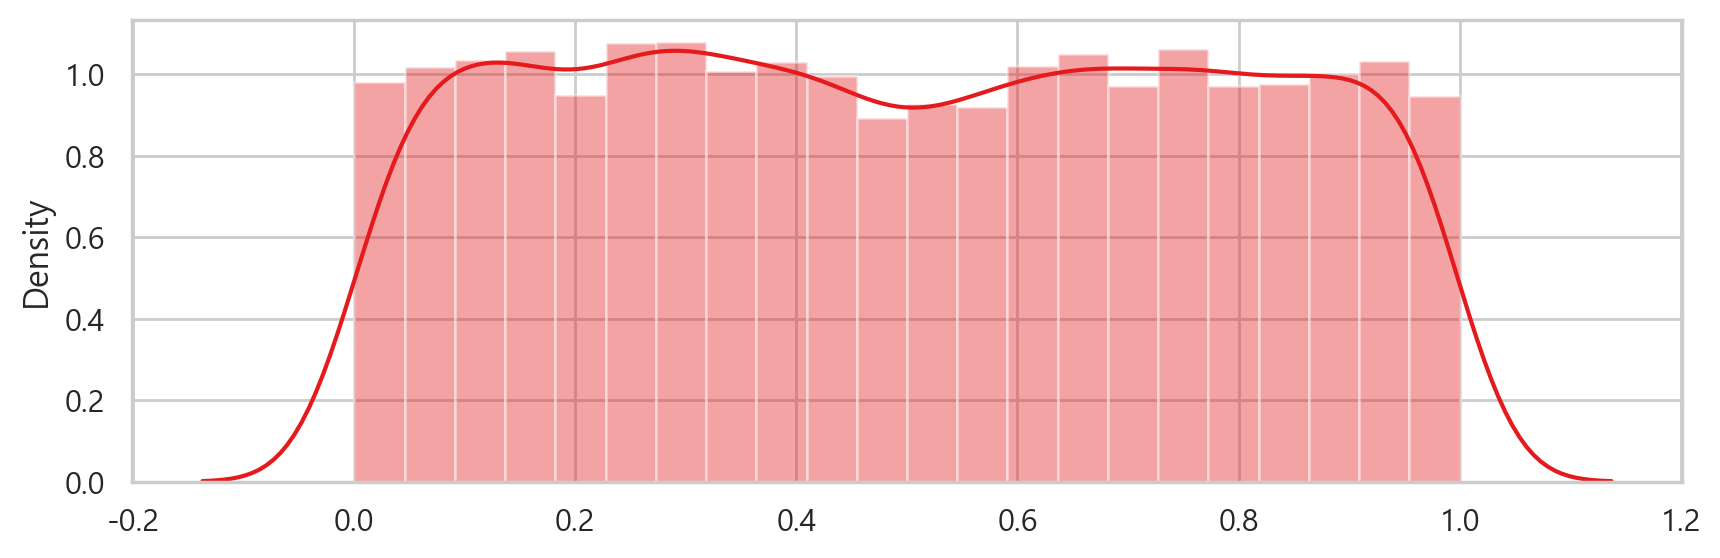

In [64]:
sns.distplot(x)
plt.show()

### 5) 회귀 그래프

In [65]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


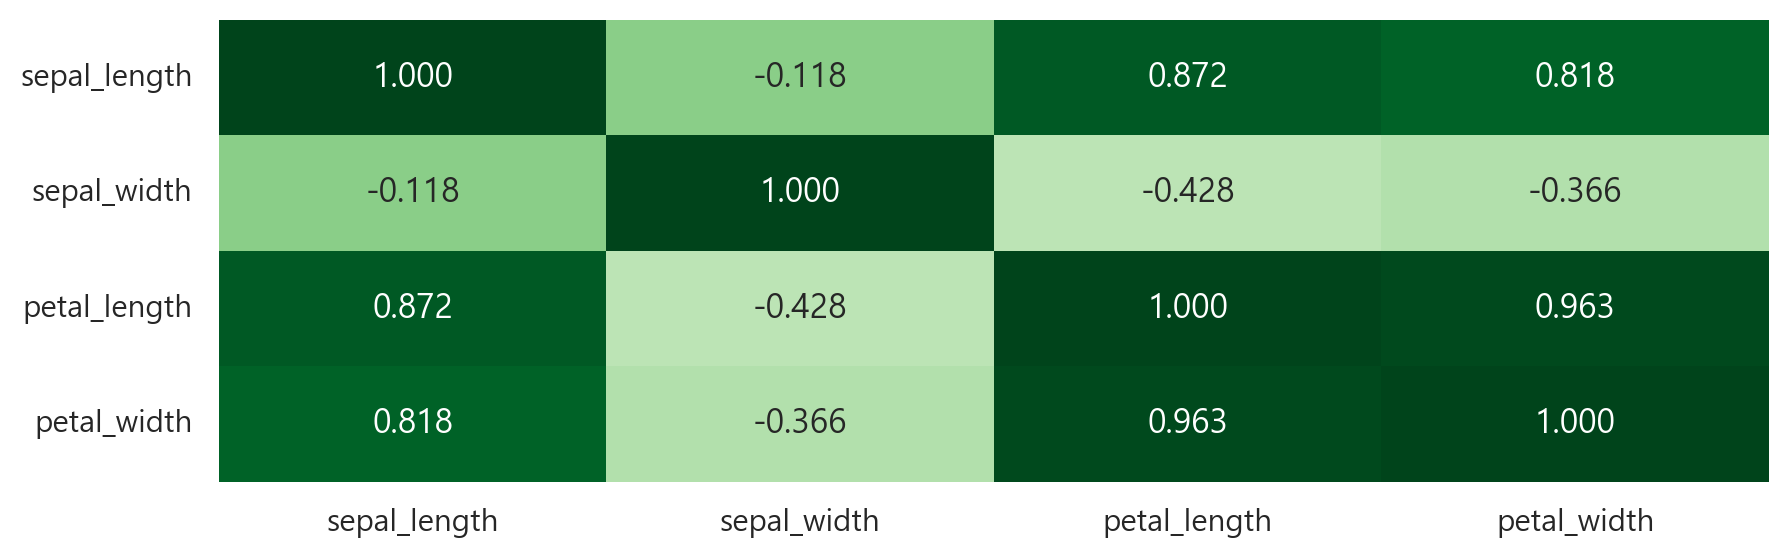

In [66]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens', cbar=False)
plt.show()

In [67]:
np.ones_like((corr), dtype=bool) # corr과 구조가 같은 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

<Axes: >

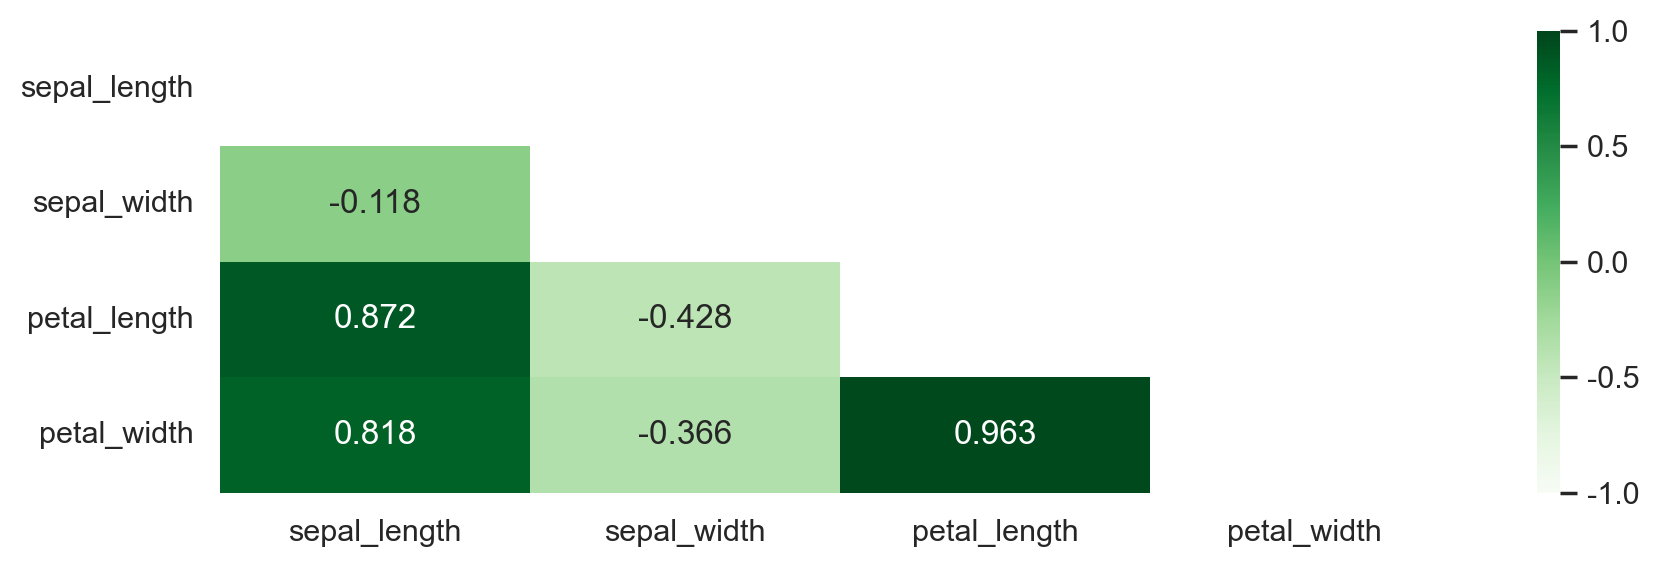

In [71]:
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens',
           mask=mask)

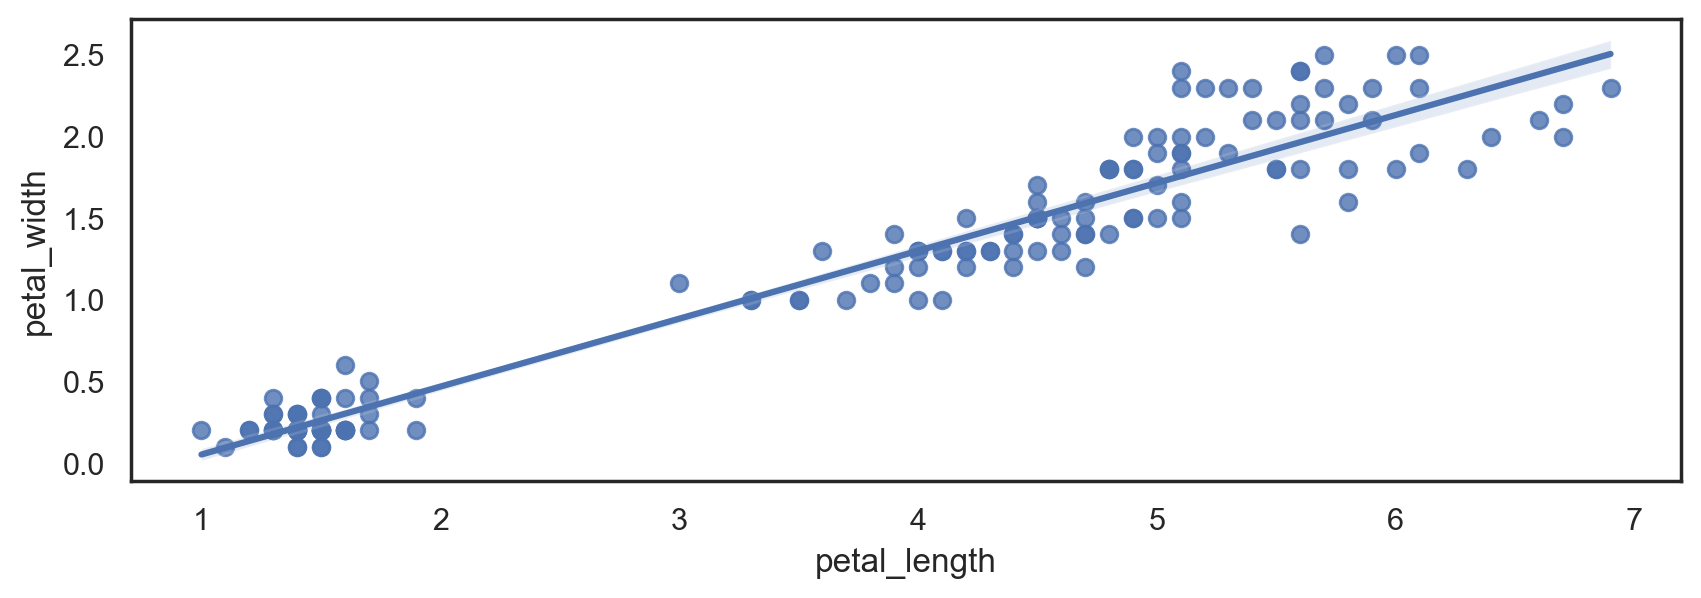

In [72]:
# 회귀그래프 : regplot(hue 사용불가), lmplot(hue 사용가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

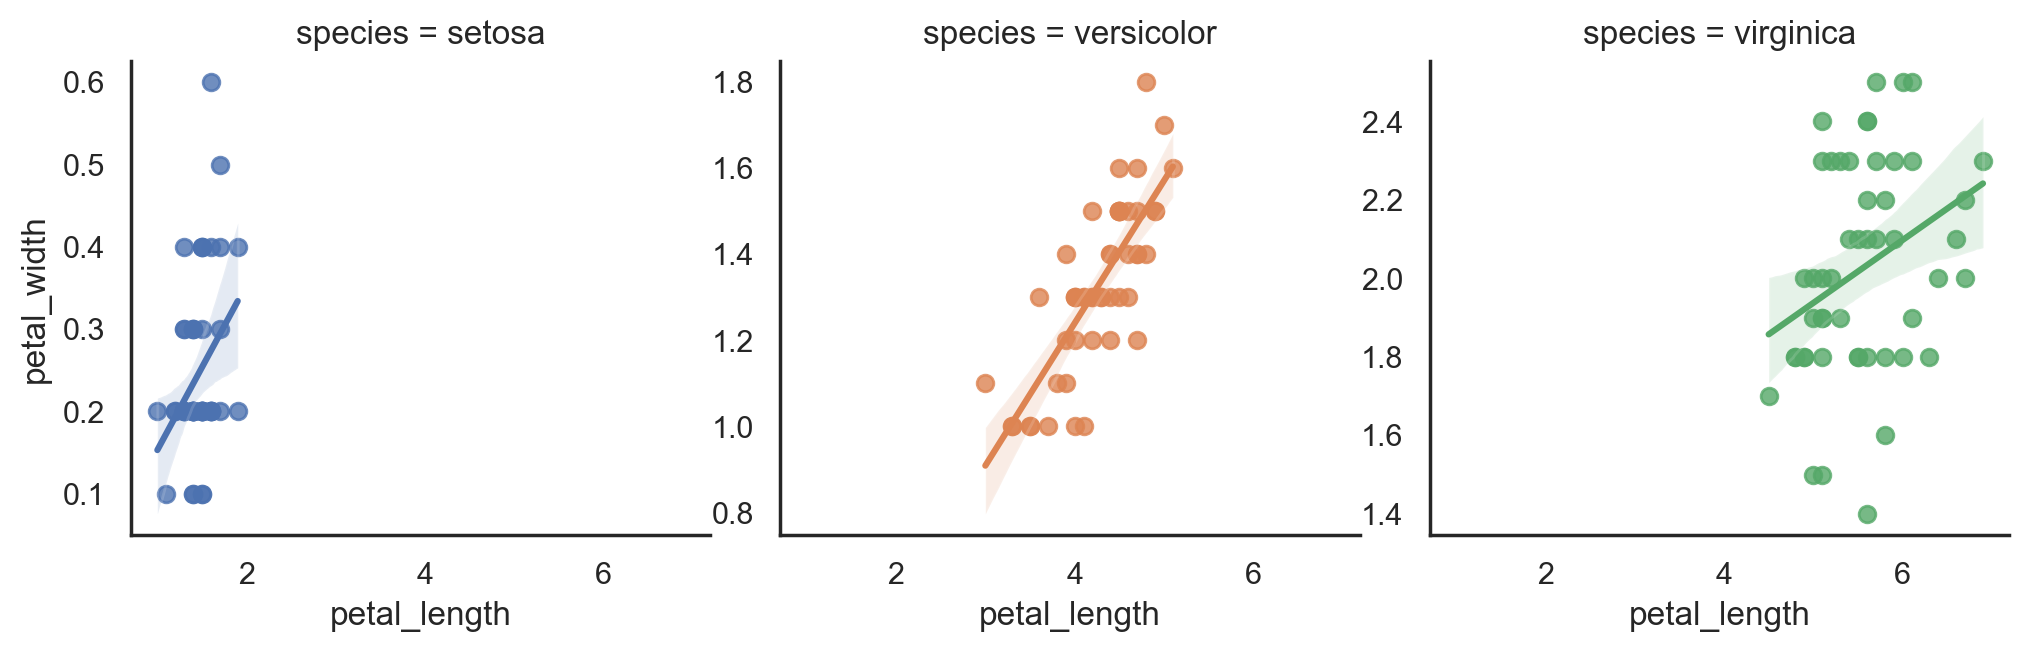

In [76]:
g = sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species',
          sharey=False)
g.fig.set_size_inches(10,3)
plt.show()

## 2.4 다중그래프를 위한 facetgrid

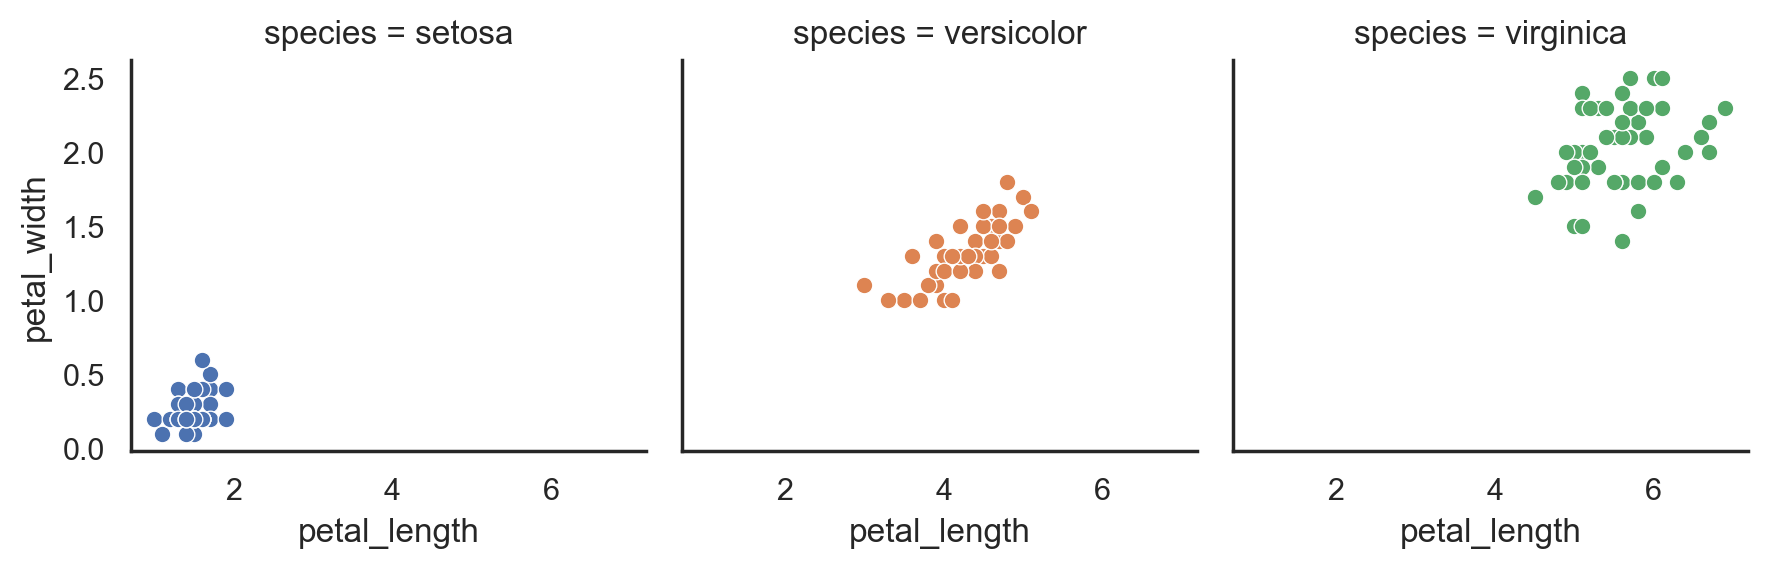

In [77]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

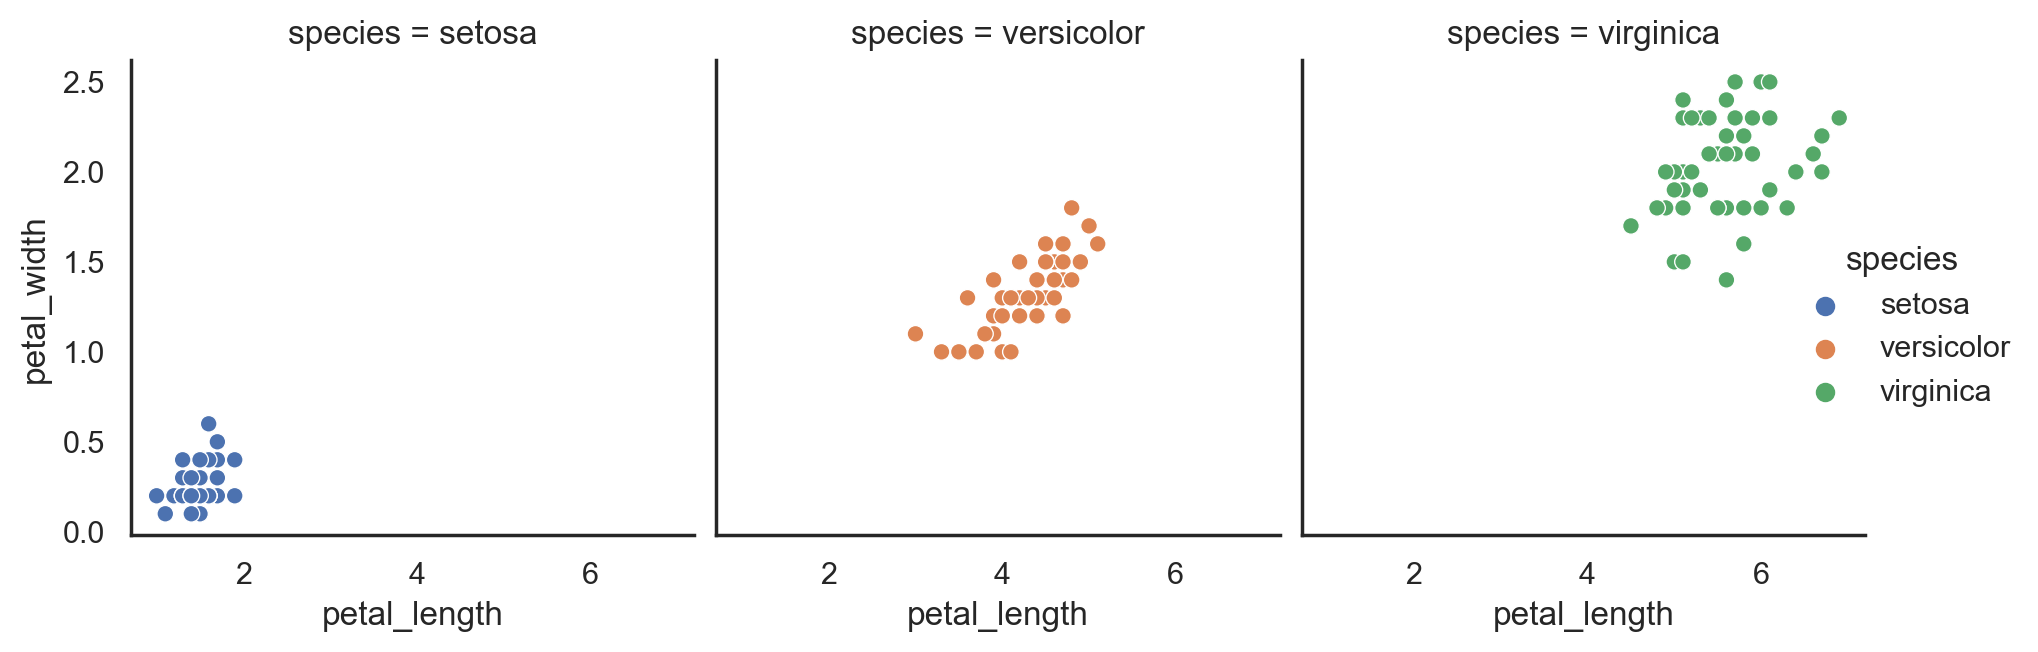

In [78]:
g= sns.relplot(iris, x='petal_length', y='petal_width', hue='species', col='species')
g.fig.set_size_inches(10,3)
plt.show()